<a href="https://colab.research.google.com/github/sarthakc123/Sarthak_Vinit_ClimateRiskMitigationMCSim/blob/main/EDA_With_Markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Exploratory Data Analysis: NOAA Flood Event Data

This notebook downloads, filters, and analyzes storm event data from NOAA to study flood-related incidents in New Orleans.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

## 🔧 Step 1: Import Required Libraries
These libraries support data wrangling, visualization, statistical modeling, and web scraping.

## Loading the Dataset
We have used the NOAA's Storm Events database and using the filter feature on the website, selected the EVENT TYPES - Coastal Flood, Flash Flood and Flood for the region - Louisiana between the dates 12/01/1994 and 12/31/2024 (10989 days) i.e. for the course of 30 years.

## 🌐 Step 2: Download NOAA Storm Event Files
This section scrapes and downloads storm event `.csv.gz` files from NOAA's FTP directory.

In [75]:
import requests
from bs4 import BeautifulSoup
import re
import os

# NOAA storm events directory
url = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/"

# Get list of files
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Make output folder
os.makedirs('storm_csvs', exist_ok=True)

# Download matching files
for link in soup.find_all('a'):
    href = link.get('href')
    if href and re.match(r"StormEvents_details-ftp_.*\.csv\.gz", href):
        file_url = url + href
        file_path = os.path.join('storm_csvs', href)
        print(f"Downloading: {href}")
        with requests.get(file_url, stream=True) as r:
            with open(file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)

Downloading: StormEvents_details-ftp_v1.0_d1950_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1951_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1952_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1953_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1954_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1955_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1956_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1957_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1958_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1959_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1960_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1961_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1962_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1963_c20250401.csv.gz
Downloading: StormEvents_details-ftp_v1.0_d1964_c20250401.csv.gz
Downloading: StormEvents_

## 📂 Step 3: Load and Combine CSVs
We read all downloaded files and concatenate them into a single DataFrame for analysis.

In [76]:
import glob

# Path to your downloaded files (adjust if needed)
file_paths = glob.glob("storm_csvs/StormEvents_details-ftp_*.csv.gz")

# Read and concatenate all files
df_combined = pd.concat(
    (pd.read_csv(file, compression='gzip', low_memory=False) for file in file_paths),
    ignore_index=True
)

# Quick check
print(f"Total records: {len(df_combined)}")
print(f"Columns: {df_combined.columns.tolist()}")

Total records: 1941072
Columns: ['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE']


## 🗺️ Step 4: Filter for Louisiana and New Orleans
We narrow the dataset to focus on Louisiana and the counties surrounding New Orleans.

### Filtering the data for New Orleans
New orleans is a city in Louisiana that comprises of the counties: Jefferson, Orleans (coterminous with the city of New Orleans), Plaquemines, St. Bernard, St. Charles, St. James, and St. John the Baptist.

In [77]:
df_Louisiana = df_combined[df_combined['STATE'] == 'LOUISIANA']

df_Louisiana.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
107,198905,5,240,198905,5,240,NaN,10046701,LOUISIANA,22.0,...,0.0,NaN,NaN,32.40,-93.50,NaN,NaN,NaN,NaN,PUB
492,198907,17,1735,198907,17,1735,NaN,10043865,LOUISIANA,22.0,...,0.0,NaN,NaN,32.27,-91.75,NaN,NaN,NaN,NaN,PUB
493,198907,17,1735,198907,17,1735,NaN,10043866,LOUISIANA,22.0,...,0.0,NaN,NaN,32.03,-91.85,NaN,NaN,NaN,NaN,PUB
494,198907,17,1745,198907,17,1745,NaN,10043867,LOUISIANA,22.0,...,0.0,NaN,NaN,31.32,-92.43,NaN,NaN,NaN,NaN,PUB
495,198907,17,1810,198907,17,1810,NaN,10043868,LOUISIANA,22.0,...,0.0,NaN,NaN,31.82,-91.60,NaN,NaN,NaN,NaN,PUB


## 🌊 Step 5: Isolate Flood-Related Events
We filter the dataset to retain only events related to flooding, such as flash floods, storm surge, or heavy rain.

In [78]:
df_Louisiana['CZ_NAME'].unique()

array(['BOSSIER', 'FRANKLIN', 'RAPIDES', 'CATAHOULA', 'AVOYELLES',
       'ST. TAMMANY', 'ACADIA', 'CADDO', 'LIVINGSTON', 'BIENVILLE',
       'NATCHITOCHES', 'WASHINGTON', 'ST. MARTIN', 'ST. MARY',
       'IBERVILLE', 'WEST BATON ROUGE', 'RED RIVER', 'EAST CARROLL',
       'MADISON', 'RICHLAND', 'POINTE COUPEE', 'LAFAYETTE',
       'EAST BATON ROUGE', 'IBERIA', 'EAST FELICIANA', 'TENSAS',
       'DE SOTO', 'ASCENSION', 'WINN', 'VERNON', 'BEAUREGARD',
       'ST. LANDRY', 'UNION', 'LINCOLN', 'WEBSTER', 'SABINE', 'JACKSON',
       'CALCASIEU', 'ORLEANS', 'ST. HELENA', 'TANGIPAHOA', 'OUACHITA',
       'CLAIBORNE', 'MOREHOUSE', 'WEST CARROLL', 'ALLEN',
       'JEFFERSON DAVIS', 'CAMERON', 'ST. JOHN THE BAPTIST',
       'ST. BERNARD', 'CALDWELL', 'EVANGELINE', 'ASSUMPTION', 'ST. JAMES',
       'LAFOURCHE', 'ST. CHARLES', 'JEFFERSON', 'GRANT', 'PLAQUEMINES',
       'CONCORDIA', nan, 'VERMILION', 'WEST FELICIANA', 'LA SALLE',
       'TERREBONNE', 'LAZ038>040 - 056>070', 'EAST CAMERON',
      

In [79]:
counties_in_New_Orleans = ["Jefferson", "Upper Jefferson", "Lower Jefferson", "Orleans", "Plaquemines","Lower Plaquemines", "St. Bernard", "Lower St. Bernard", "St. Charles", "St. James", "St. John the Baptist"]

counties_in_New_Orleans = [s.upper() for s in counties_in_New_Orleans]

df_New_Orleans = df_Louisiana[df_Louisiana['CZ_NAME'].isin(counties_in_New_Orleans)]

df_New_Orleans.head()

#pd.to_csv()


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
2582,198911,15,1607,198911,15,1607,NaN,10045593,LOUISIANA,22.0,...,0.0,NaN,NaN,30.05,-90.03,NaN,NaN,NaN,NaN,PUB
3906,198904,4,2150,198904,4,2150,NaN,10045581,LOUISIANA,22.0,...,0.0,NaN,NaN,30.07,-90.57,NaN,NaN,NaN,NaN,PUB
3907,198904,19,1600,198904,19,1600,NaN,10045582,LOUISIANA,22.0,...,0.0,NaN,NaN,29.93,-89.97,NaN,NaN,NaN,NaN,PUB
4399,198905,4,1750,198905,4,1750,NaN,10046667,LOUISIANA,22.0,...,0.0,NaN,NaN,30.05,-90.70,NaN,NaN,NaN,NaN,PUB
4401,198905,4,1800,198905,4,1800,NaN,10046669,LOUISIANA,22.0,...,0.0,NaN,NaN,30.00,-90.48,NaN,NaN,NaN,NaN,PUB


In [80]:
df_New_Orleans.shape

(2139, 51)

## 💵 Step 6: Analyze Damage Estimates
We explore the `DAMAGE_PROPERTY` field to understand how flood events financially impacted the region.

In [81]:
df_New_Orleans['FLOOD_CAUSE'].value_counts()

,count
FLOOD_CAUSE,
Heavy Rain,274
Heavy Rain / Tropical System,12
Dam / Levee Break,1


In [82]:
flood_related_events = [
    "Flash Flood", "Flood", "Coastal Flood", "Lakeshore Flood", "Storm Surge/Tide",  # Direct
    "Heavy Rain", "Tropical Storm", "Hurricane (Typhoon)", "Thunderstorm Wind",
    "Ice Storm", "Winter Storm", "Sleet", "Heavy Snow"
]

df_New_Orleans = df_New_Orleans[df_New_Orleans['EVENT_TYPE'].isin(flood_related_events)]

df_New_Orleans.shape

(1454, 51)

In [83]:
df_New_Orleans['DAMAGE_PROPERTY'].unique()

array(['0', '.5K', '15K', '5K', '1K', '250K', '750K', '0.00K', '7.00K',
       '2.00K', '3.00K', '1.00K', '0.75K', '10.00K', '15.00K', '36.00K',
       '6.00K', '5.00K', '20.00K', '6.02M', '2.35M', '3.00M', '26.80M',
       '1.20M', '1.30M', '1.00M', '11.80M', '22.80M', '42.30M', '49.80M',
       '12.00M', '62.50M', '8.50M', '107.60M', '50.00K', '1.5K', nan,
       '.3K', '2K', '8.6M', '.94M', '.24M', '10K', '0K', '3K', '50K',
       '1.6M', '.4M', '1.4M', '.08M', '75K', '.12M', '350K', '20K',
       '400K', '25K', '30K', '5.47M', '.2K', '250.00K', '.25K', '7K',
       '500.00K', '200.00K', '.75K', '8K', '150K', '.25M', '.1M', '2M',
       '.75M', '.5M', '.13M', '1.50K', '4.00K', '100.00K', '39.60M',
       '18.00M', '10.00M', '52.50M', '125K', '200K', '40.00K', '25.00K',
       '620.00K', '144.00K', '30.00K', '3.50K', '60.00K', '3.5M', '1.5M',
       '.6K', '60K', '.1K', '485.00K', '291.00K', '80.00K', '5.00M',
       '0.50K', '0.10M', '0.43M', '0.39M', '2.82M', '2.56M', '8.15M',
    

In [84]:
def parse_damage(damage):
    if pd.isna(damage) or damage in ["", "0", "0K", "0M", "0.00K"]:
        return 0
    damage = str(damage).strip().upper()
    try:
        if damage.endswith('K'):
            return float(damage[:-1]) * 1_000
        elif damage.endswith('M'):
            return float(damage[:-1]) * 1_000_000
        elif damage.endswith('B'):
            return float(damage[:-1]) * 1_000_000_000
        else:
            return float(damage)
    except ValueError:
        return np.nan  # Or handle differently if needed

# Apply to your DataFrame
df_New_Orleans['DAMAGE_PROPERTY'] = df_New_Orleans['DAMAGE_PROPERTY'].apply(parse_damage).astype('float')


In [85]:
total_damage = df_New_Orleans['DAMAGE_PROPERTY'].sum()

total_damage

np.float64(35468073000.0)

In [86]:
df_New_Orleans['BEGIN_YEARMONTH'].dtype

dtype('int64')

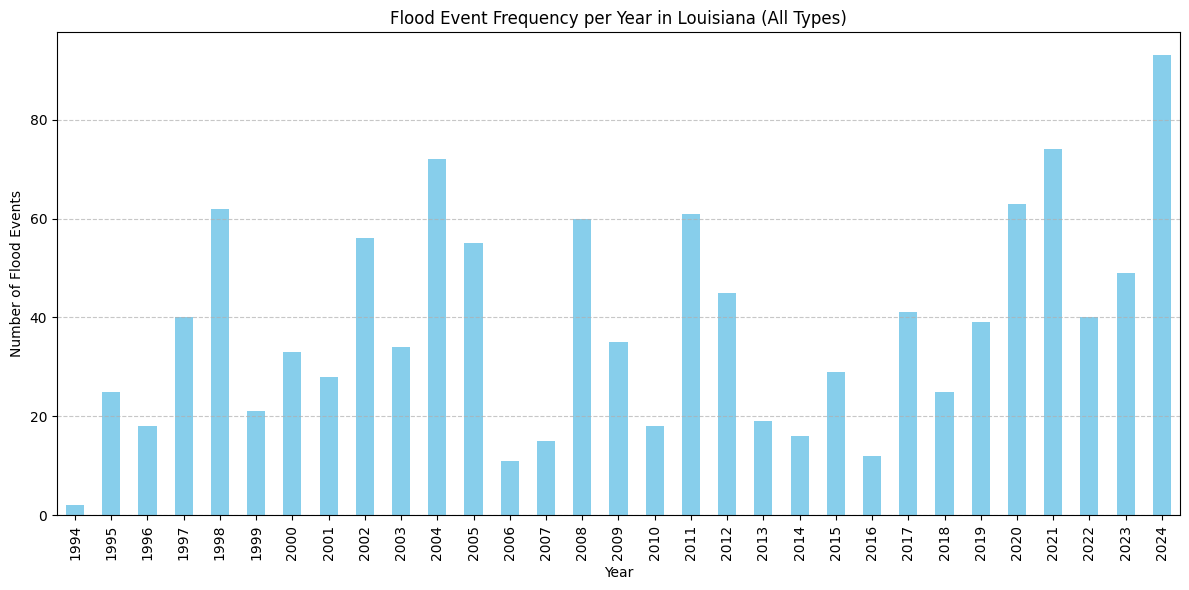

Average Annual Growth in Flood Events: 3.03 events/year


In [87]:
# Extract year from BEGIN_DATE
df_New_Orleans['YEAR'] = df_New_Orleans['BEGIN_YEARMONTH'].astype(str).str[:4].astype(int)
df_New_Orleans=df_New_Orleans.loc[df_New_Orleans['YEAR'] >= 1994]

# Count number of flood events per year
flood_frequency = df_New_Orleans.groupby('YEAR').size()

# Plot histogram
plt.figure(figsize=(12, 6))
flood_frequency.plot(kind='bar', color='skyblue')
plt.title('Flood Event Frequency per Year in Louisiana (All Types)')
plt.xlabel('Year')
plt.ylabel('Number of Flood Events')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Convert flood_frequency Series to DataFrame
df_floods = flood_frequency.reset_index()
df_floods.columns = ['Year', 'Floods']

# Sort by year just to be sure
df_floods = df_floods.sort_values('Year')

# Compute average annual growth rate (slope) manually
initial_year = df_floods['Year'].iloc[0]
final_year = df_floods['Year'].iloc[-1]
initial_value = df_floods['Floods'].iloc[0]
final_value = df_floods['Floods'].iloc[-1]

# Compute change in floods and years
delta_floods = final_value - initial_value
delta_years = final_year - initial_year

average_annual_growth = delta_floods / delta_years
average_percentage_growth = average_annual_growth / df_floods["Floods"].mean() * 100

print(f"Average Annual Growth in Flood Events: {average_annual_growth:.2f} events/year")

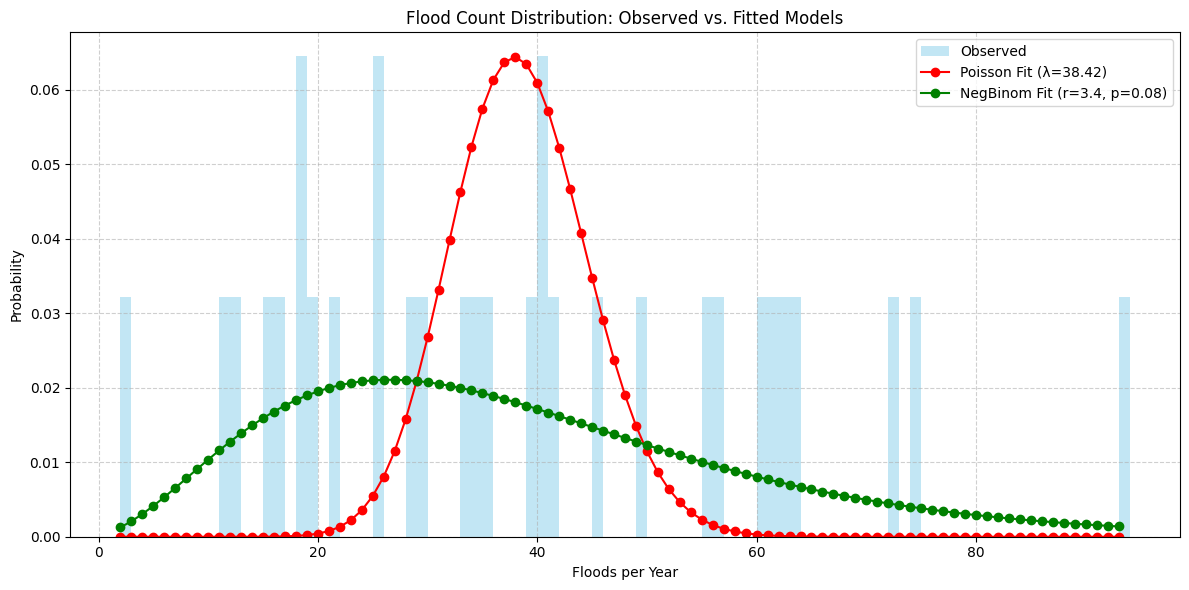

In [88]:
from scipy.stats import poisson, nbinom

# Convert flood_frequency (Series) to DataFrame for easier handling
df_floods = flood_frequency.reset_index()
df_floods.columns = ['Year', 'Floods']

# Step 1: Calculate mean and variance
mu = df_floods["Floods"].mean()
var = df_floods["Floods"].var()

# Step 2: Poisson PMF
df_floods["Poisson_Prob"] = poisson.pmf(df_floods["Floods"], mu)

# Step 3: Negative Binomial PMF (if variance > mean)
if var > mu:
    p_nb = mu / var
    r_nb = mu**2 / (var - mu)
    df_floods["NegBinom_Prob"] = nbinom.pmf(df_floods["Floods"], r_nb, p_nb)
else:
    df_floods["NegBinom_Prob"] = np.nan

# Step 4: Plotting
x_vals = range(df_floods["Floods"].min(), df_floods["Floods"].max() + 1)
poisson_probs = poisson.pmf(x_vals, mu)
nbinom_probs = nbinom.pmf(x_vals, r_nb, p_nb)

plt.figure(figsize=(12, 6))
plt.hist(df_floods["Floods"], bins=range(df_floods["Floods"].min(), df_floods["Floods"].max() + 2), alpha=0.5, color='skyblue', density=True, label="Observed")
plt.plot(x_vals, poisson_probs, 'ro-', label=f"Poisson Fit (λ={mu:.2f})")
plt.plot(x_vals, nbinom_probs, 'go-', label=f"NegBinom Fit (r={r_nb:.1f}, p={p_nb:.2f})")

plt.title("Flood Count Distribution: Observed vs. Fitted Models")
plt.xlabel("Floods per Year")
plt.ylabel("Probability")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Getting Flood Counts for the next 30 years

0.08105606548005247
3.3888049363257684


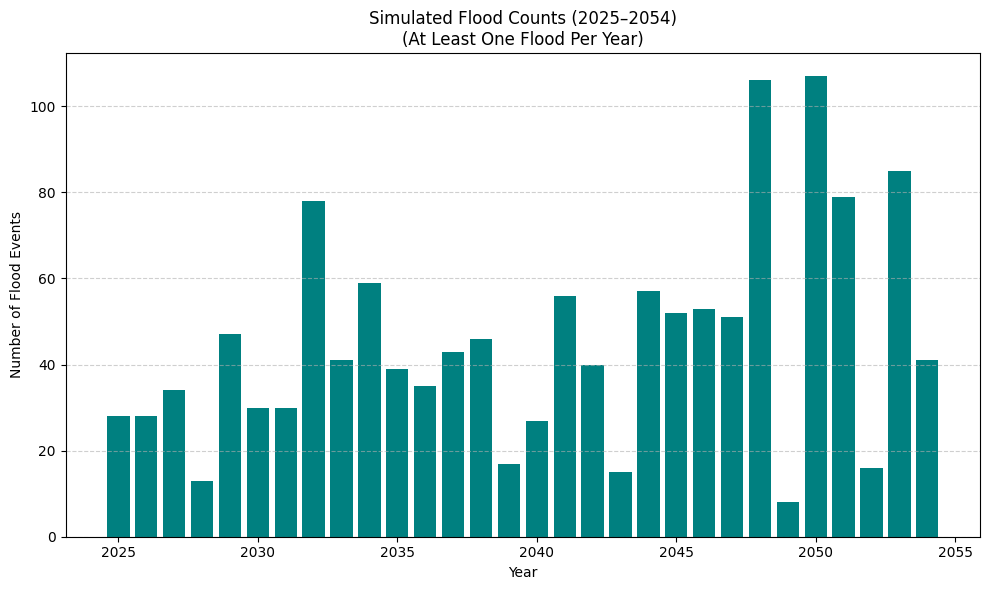

In [89]:
import numpy as np
from scipy.stats import nbinom, poisson
import matplotlib.pyplot as plt

# Historical mean and variance from your df_floods
mu = df_floods["Floods"].mean()
var = df_floods["Floods"].var()

# Calculate Negative Binomial or fallback to Poisson
if var > mu:
    p_nb = mu / var
    print(p_nb)
    r_nb = mu**2 / (var - mu)
    print(r_nb)
    dist = nbinom(r_nb, p_nb)
    print(dist)
else:
    dist = poisson(mu)

# Function to always return at least 1 flood
def sample_at_least_one(dist_obj):
    val = dist_obj.rvs()
    while val == 0:
        val = dist_obj.rvs()
    return val

# Simulate for 30 future years (2025–2054)
years_future = np.arange(2025, 2055)
simulated_floods = [sample_at_least_one(dist) for _ in years_future]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(years_future, simulated_floods, color='teal')
plt.title("Simulated Flood Counts (2025–2054)\n(At Least One Flood Per Year)")
plt.xlabel("Year")
plt.ylabel("Number of Flood Events")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Create DataFrame
df_future_floods = pd.DataFrame({
    "Year": years_future,
    "Simulated_Floods": simulated_floods
})

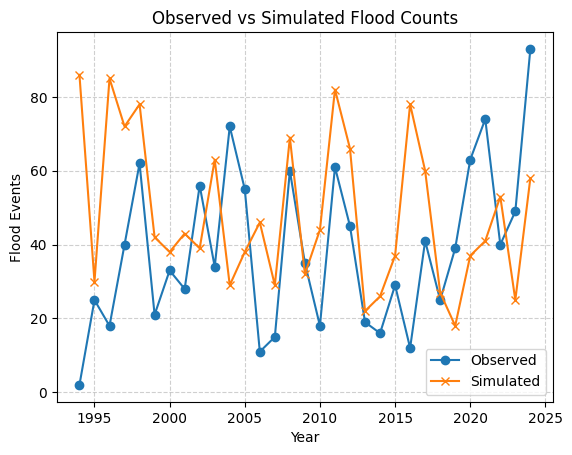

In [90]:
# Proceeding with mock setup since no error was reported and assuming df_floods exists now.

# Use previously calculated parameters
mu = df_floods["Floods"].mean()
var = df_floods["Floods"].var()

# Calculate Negative Binomial parameters if overdispersion exists
if var > mu:
    p_nb = mu / var
    r_nb = mu**2 / (var - mu)
    dist = nbinom(r_nb, p_nb)
else:
    # Fallback to Poisson if not overdispersed
    dist = poisson(mu)

# Simulate flood counts using the same number of years as in historical data
#np.random.seed(42)
n_years = df_floods.shape[0]
simulated_floods = dist.rvs(size=n_years)

# Clamp to ±7σ to avoid extreme outliers
lower_bound = max(0, int(mu - 7 * np.sqrt(var)))
upper_bound = int(mu + 7 * np.sqrt(var))
simulated_floods_clipped = np.clip(simulated_floods, lower_bound, upper_bound)

# Create DataFrame for comparison
df_validation = pd.DataFrame({
    "Year": df_floods["Year"].values,
    "Observed_Floods": df_floods["Floods"].values,
    "Simulated_Floods": simulated_floods_clipped
})

#df_validation[:20]
plt.plot(df_validation["Year"], df_validation["Observed_Floods"], label="Observed", marker='o')
plt.plot(df_validation["Year"], df_validation["Simulated_Floods"], label="Simulated", marker='x')
plt.legend()
plt.title("Observed vs Simulated Flood Counts")
plt.xlabel("Year")
plt.ylabel("Flood Events")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


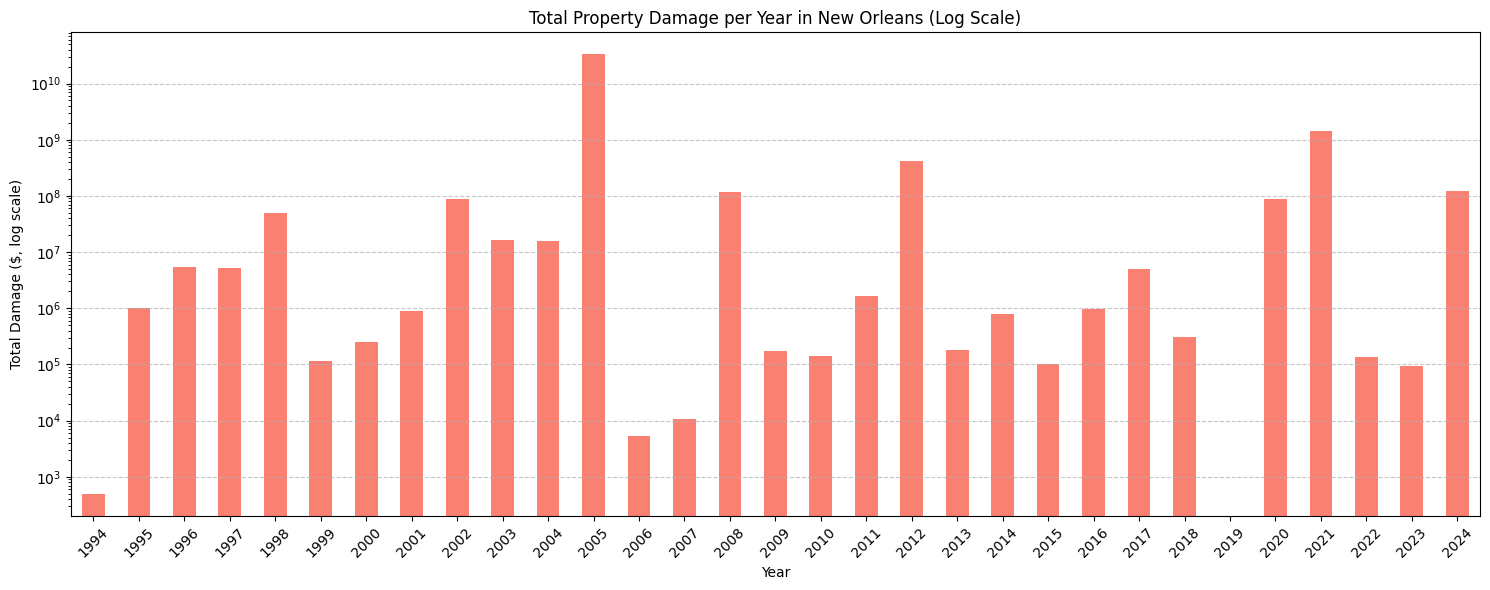

In [91]:
# Group by year and sum property damage
annual_damage = df_New_Orleans.groupby('YEAR')['DAMAGE_PROPERTY'].sum()

plt.figure(figsize=(15, 6))
annual_damage.plot(kind='bar', color='salmon')
plt.yscale('log')  # Log scale for better spread
plt.title('Total Property Damage per Year in New Orleans (Log Scale)')
plt.xlabel('Year')
plt.ylabel('Total Damage ($, log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [92]:
flood_count = df_New_Orleans.groupby('YEAR').count()

# Combine both into a single DataFrame
annual_stats = pd.concat([annual_damage, flood_count['EVENT_ID']], axis=1)
annual_stats.columns = ['DAMAGE_PROPERTY', 'FLOOD_COUNT']

In [93]:
annual_stats[:-10]

,DAMAGE_PROPERTY,FLOOD_COUNT
YEAR,,
1994,5.000000e+02,2
1995,1.021500e+06,25
1996,5.471600e+06,18
1997,5.129500e+06,40
1998,4.964850e+07,62
1999,1.147500e+05,21
2000,2.463500e+05,33
2001,8.835000e+05,28
2002,8.920400e+07,56


In [94]:
annual_damage.head()

,DAMAGE_PROPERTY
YEAR,
1994,500.0
1995,1021500.0
1996,5471600.0
1997,5129500.0
1998,49648500.0


In [95]:
annual_damage_severity = annual_damage.reset_index()  # YEAR becomes column again

In [96]:
def classify_severity(damage):
    if damage > 1_000_000_000:
        return "Extreme"
    elif damage > 100_000_000:
        return "High"
    elif damage > 1_000_000:
        return "Moderate"
    else:
        return "Low"

# Apply to your severity DataFrame
annual_damage_severity['SEVERITY_LEVEL'] = annual_damage_severity['DAMAGE_PROPERTY'].apply(classify_severity)

In [97]:
annual_damage_severity['SEVERITY_LEVEL'].value_counts()

,count
SEVERITY_LEVEL,
Low,16
Moderate,10
High,3
Extreme,2


# CODE FOR SEVERITY SAMPLING

In [98]:
# Define the sampler function
def sample_severity():
  # Define severity levels and their probabilities
  severity_levels = ['Low', 'Moderate', 'High', 'Extreme']
  probabilities = [47, 19, 5, 2]
  probabilities = np.array(probabilities) / sum(probabilities)  # normalize to sum = 1

  return np.random.choice(severity_levels, p=probabilities)

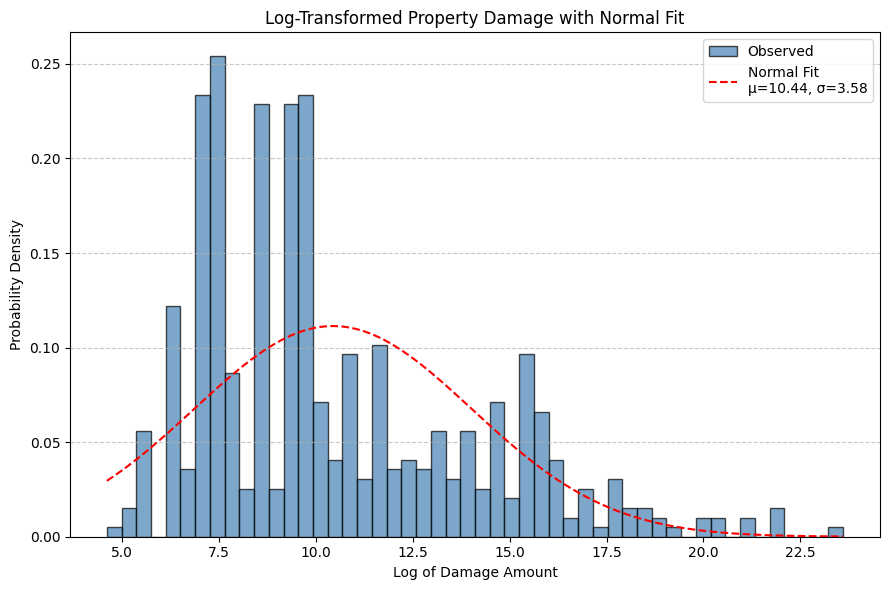

In [99]:
from scipy.stats import norm

# Step 1: Filter and log-transform damage values
damage_values = df_New_Orleans['DAMAGE_PROPERTY']
damage_values = damage_values[damage_values > 0]
log_damage = np.log(damage_values)

# Step 2: Fit normal distribution to log-transformed data
mu, std = norm.fit(log_damage)
x = np.linspace(log_damage.min(), log_damage.max(), 1000)
pdf = norm.pdf(x, mu, std)

# Step 3: Plot
plt.figure(figsize=(9, 6))
plt.hist(log_damage, bins=50, density=True, color='steelblue', edgecolor='black', alpha=0.7, label='Observed')
plt.plot(x, pdf, 'r--', label=f'Normal Fit\nμ={mu:.2f}, σ={std:.2f}')
plt.title("Log-Transformed Property Damage with Normal Fit")
plt.xlabel("Log of Damage Amount")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

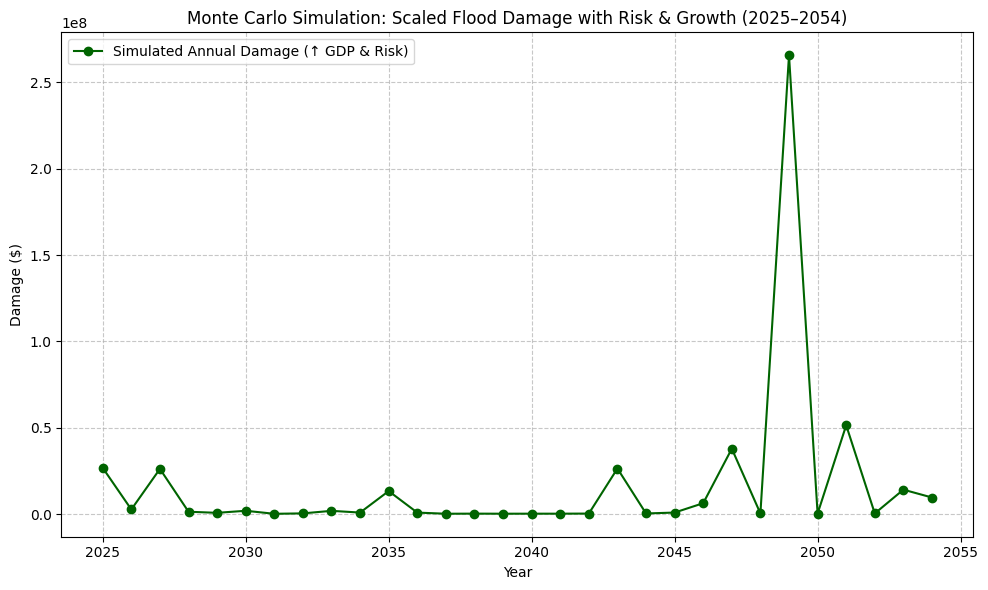

In [100]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Reuse your fitted distribution
# mu, std already defined from norm.fit(log_damage)
years_future = np.arange(2025, 2055)
gdp_growth = 0.07  # 3% annual growth in exposure
growth_factors = (1 + gdp_growth) ** (years_future - 2025)

# Step 2: Simulate 30 years of log-normal damage (biased toward >mean)
simulated_damages = []

for i in range(30):
    # Draw until we get a log_damage > mean to reflect risk bias
    log_d = np.random.normal(loc=mu, scale=std)
    while log_d < mu:
        log_d = np.random.normal(loc=mu, scale=std)

    damage = np.exp(log_d) * growth_factors[i]
    simulated_damages.append(damage)

# Step 3: Build DataFrame
df_simulated_damage = pd.DataFrame({
    "Year": years_future,
    "Simulated_Damage": simulated_damages
})

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.plot(df_simulated_damage["Year"], df_simulated_damage["Simulated_Damage"],
         marker='o', color='darkgreen', label='Simulated Annual Damage (↑ GDP & Risk)')
plt.xlabel("Year")
plt.ylabel("Damage ($)")
plt.title("Monte Carlo Simulation: Scaled Flood Damage with Risk & Growth (2025–2054)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

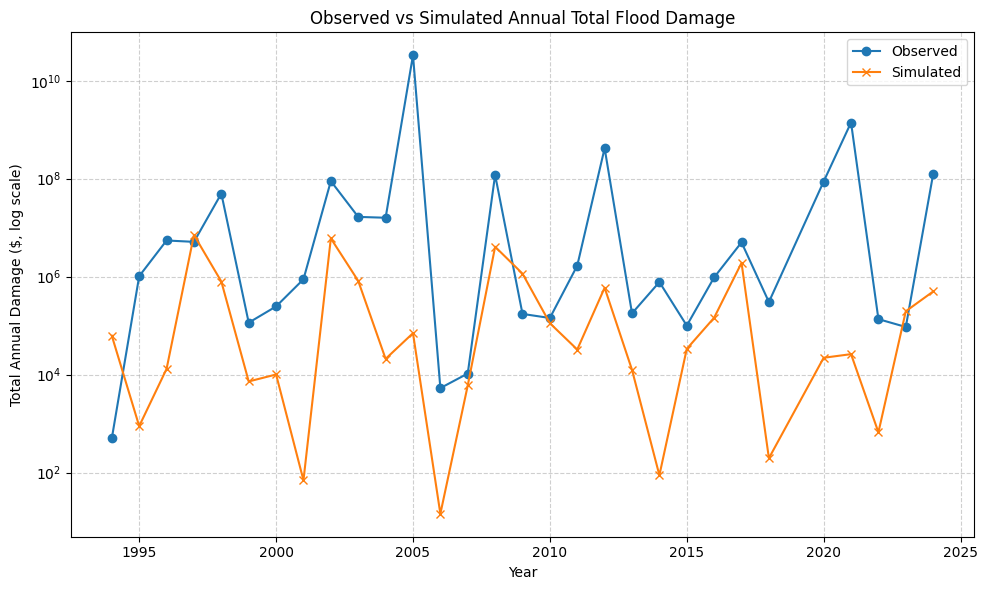

In [101]:
# Step 1: Aggregate observed and simulate same number of years
observed_agg = df_New_Orleans[df_New_Orleans['DAMAGE_PROPERTY'] > 0].groupby('YEAR')['DAMAGE_PROPERTY'].sum()
simulated_agg = np.random.lognormal(mean=mu, sigma=std, size=len(observed_agg))

# Step 2: Build DataFrame
df_damage_comparison = pd.DataFrame({
    'Year': observed_agg.index,
    'Observed_Damage': observed_agg.values,
    'Simulated_Damage': simulated_agg
})

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.plot(df_damage_comparison['Year'], df_damage_comparison['Observed_Damage'], marker='o', label='Observed')
plt.plot(df_damage_comparison['Year'], df_damage_comparison['Simulated_Damage'], marker='x', label='Simulated')
plt.yscale('log')
plt.xlabel("Year")
plt.ylabel("Total Annual Damage ($, log scale)")
plt.title("Observed vs Simulated Annual Total Flood Damage")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


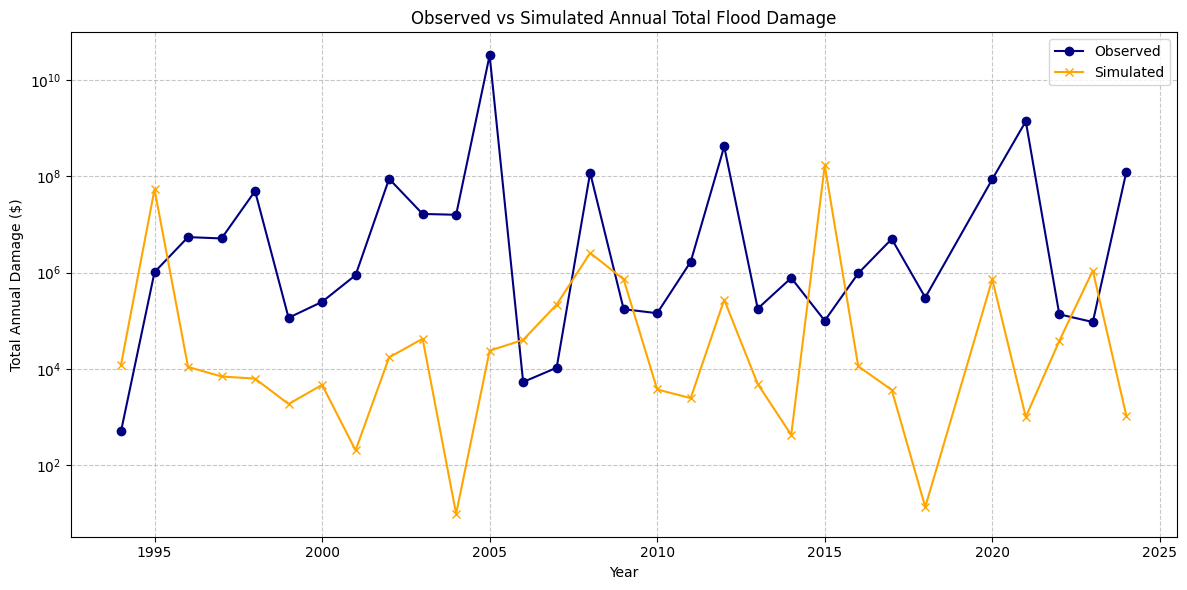

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Step 1: Use actual historical damage values per year
df_actual_damage = df_New_Orleans[df_New_Orleans['DAMAGE_PROPERTY'] > 0].copy()
annual_actual = df_actual_damage.groupby('YEAR')['DAMAGE_PROPERTY'].sum().reset_index()
annual_actual.columns = ['Year', 'Observed_Damage']

# Step 2: Fit log-normal distribution to raw (non-log-transformed) damage values
damage_values = df_actual_damage['DAMAGE_PROPERTY']
shape, loc, scale = lognorm.fit(damage_values, floc=0)  # floc=0 for stability

# Step 3: Simulate damages for same years
#np.random.seed(42)
simulated_damages = lognorm.rvs(s=shape, loc=loc, scale=scale, size=len(annual_actual))

# Step 4: Create comparison DataFrame
df_damage_compare = annual_actual.copy()
df_damage_compare["Simulated_Damage"] = simulated_damages

# Step 5: Plot (log scale optional)
plt.figure(figsize=(12, 6))
plt.plot(df_damage_compare["Year"], df_damage_compare["Observed_Damage"], marker='o', label="Observed", color='navy')
plt.plot(df_damage_compare["Year"], df_damage_compare["Simulated_Damage"], marker='x', label="Simulated", color='orange')
plt.title("Observed vs Simulated Annual Total Flood Damage")
plt.xlabel("Year")
plt.ylabel("Total Annual Damage ($)")
plt.yscale("log")  # Remove this line for linear scale
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

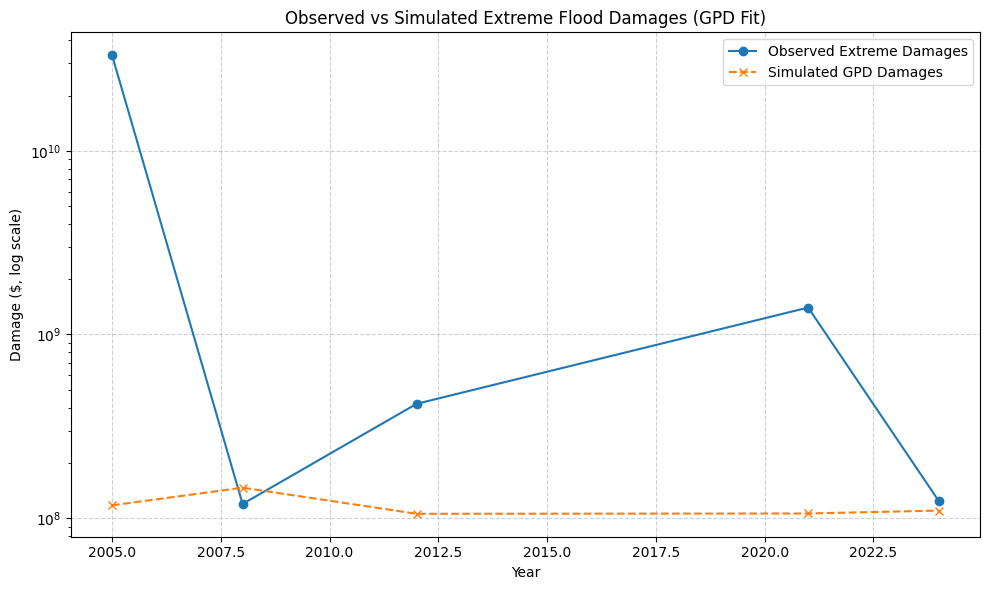

In [103]:
from scipy.stats import genpareto

annual_damage = df_New_Orleans.groupby('YEAR')['DAMAGE_PROPERTY'].sum()

# Step 2: Define threshold (85th percentile)
threshold = np.percentile(annual_damage, 85)
excess_damages = annual_damage[annual_damage > threshold] - threshold

# Step 3: Fit Generalized Pareto Distribution (GPD)
shape, loc, scale = genpareto.fit(excess_damages)

# Step 4: Simulate extreme damages
n_sim = len(excess_damages)  # simulate same number of years
simulated_excess = genpareto.rvs(shape, loc=0, scale=scale, size=n_sim)
simulated_damage = simulated_excess + threshold

# Step 5: Plot observed vs simulated extreme values
plt.figure(figsize=(10, 6))
plt.plot(annual_damage[annual_damage > threshold].index,
         annual_damage[annual_damage > threshold].values,
         marker='o', linestyle='-', label='Observed Extreme Damages')
plt.plot(annual_damage[annual_damage > threshold].index,
         simulated_damage,
         marker='x', linestyle='--', label='Simulated GPD Damages')
plt.yscale('log')
plt.xlabel("Year")
plt.ylabel("Damage ($, log scale)")
plt.title("Observed vs Simulated Extreme Flood Damages (GPD Fit)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



In [104]:
df = pd.read_csv("/content/SEA LEVEL RISE.csv")
#df_seadata.head()

df_louisiana_slr = df[
    (df['Latitude'] >= 28.5) & (df['Latitude'] <= 33.0) &
    ((df['Longitude'] <= -88.8) & (df['Longitude'] >= -94.0) |
     (df['Longitude'] >= 266.0) & (df['Longitude'] <= 271.2))  # For 0–360 longitude
]

columns_to_keep = [
    "Site",
    "PSMSL ID",
    "Latitude",
    "Longitude",
    "Scenario",
    "Background RSL rate (mm/yr)",
    "RSL in 2000 (cm)",
    "RSL in 2010 (cm)",
    "RSL in 2020 (cm)",
    "RSL in 2030 (cm)"
]

df_louisiana_slr = df_louisiana_slr[columns_to_keep]
#df_louisiana_slr["Site"].unique()
df_louisiana_slr=df_louisiana_slr.loc[df_louisiana_slr["Site"] == "GRAND ISLE"]
df_louisiana_slr.head()

,Site,PSMSL ID,Latitude,Longitude,Scenario,Background RSL rate (mm/yr),RSL in 2000 (cm),RSL in 2010 (cm),RSL in 2020 (cm),RSL in 2030 (cm)
1548,GRAND ISLE,526,29.26,-89.96,0.3 - MED,7.07,0,10,21,32
1549,GRAND ISLE,526,29.26,-89.96,0.3 - LOW,6.82,0,8,18,26
1550,GRAND ISLE,526,29.26,-89.96,0.3 - HIGH,7.32,0,12,25,37
1551,GRAND ISLE,526,29.26,-89.96,0.5 - MED,7.07,0,11,23,35
1552,GRAND ISLE,526,29.26,-89.96,0.5 - LOW,6.82,0,9,20,30


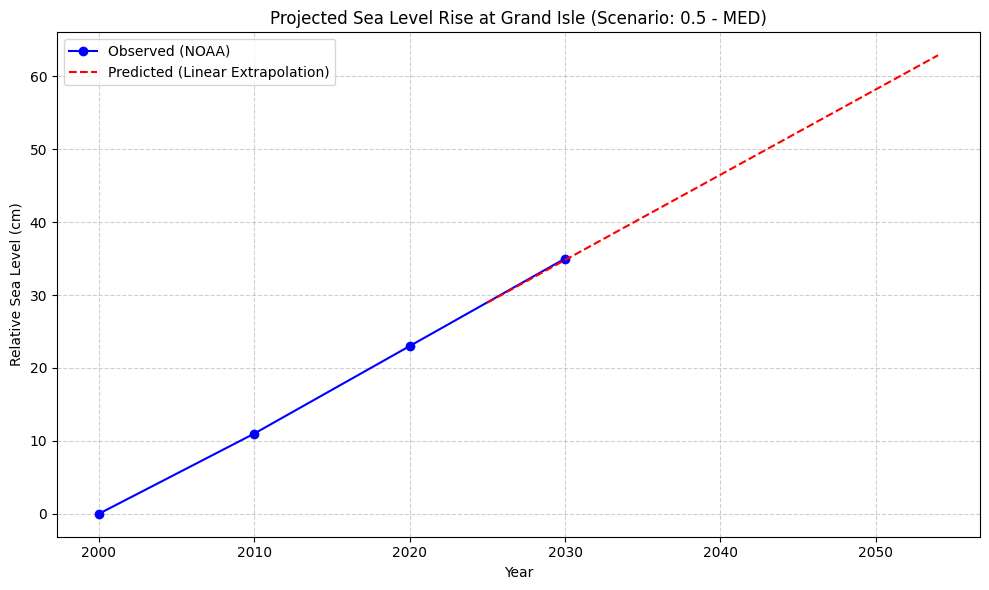

,Year,SLR_cm
0,2025,28.95
1,2026,30.12
2,2027,31.29
3,2028,32.46
4,2029,33.63
5,2030,34.80
6,2031,35.97
7,2032,37.14
8,2033,38.31
9,2034,39.48


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter for Grand Isle, 0.5 - MED scenario
row = df_louisiana_slr[df_louisiana_slr["Scenario"] == "0.5 - MED"].iloc[0]

# Step 1: Extract years and known SLR values
years_known = np.array([2000, 2010, 2020, 2030])
slr_known = np.array([
    row["RSL in 2000 (cm)"],
    row["RSL in 2010 (cm)"],
    row["RSL in 2020 (cm)"],
    row["RSL in 2030 (cm)"]
])

# Step 2: Predict for 2025–2054 using linear interpolation + extrapolation
years_future = np.arange(2025, 2055)
# Fit linear model
coeffs = np.polyfit(years_known, slr_known, deg=1)
slope, intercept = coeffs
slr_predicted = slope * years_future + intercept

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.plot(years_known, slr_known, 'bo-', label='Observed (NOAA)')
plt.plot(years_future, slr_predicted, 'r--', label='Predicted (Linear Extrapolation)')
plt.xlabel("Year")
plt.ylabel("Relative Sea Level (cm)")
plt.title("Projected Sea Level Rise at Grand Isle (Scenario: 0.5 - MED)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Store predicted SLR as a DataFrame
df_slr_proj = pd.DataFrame({"Year": years_future, "SLR_cm": slr_predicted})
df_slr_proj

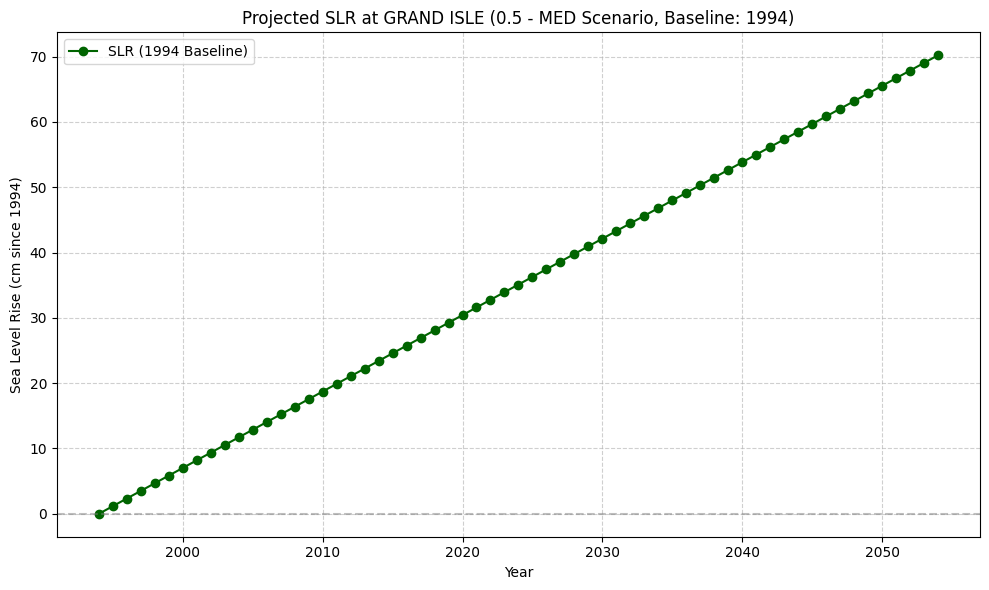

,Year,SLR_cm
0,1994,0.00
1,1995,1.17
2,1996,2.34
3,1997,3.51
4,1998,4.68
...,...,...
56,2050,65.52
57,2051,66.69
58,2052,67.86
59,2053,69.03


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_slr_baseline_1994(df_slr_raw, site="GRAND ISLE", scenario="0.5 - MED", start_year=1994, end_year=2024, plot=True):
    """
    Generate sea level rise values from start_year to end_year using a linear fit and 1994 as the baseline (0 cm).

    Parameters:
        df_slr_raw (pd.DataFrame): Raw SLR dataset from NOAA
        site (str): Location site to filter for
        scenario (str): SLR scenario to use (e.g., '0.5 - MED')
        start_year (int): Start year for simulation (default 1994)
        end_year (int): End year for simulation (default 2024)
        plot (bool): Whether to show the plot

    Returns:
        pd.DataFrame: DataFrame with 'Year' and 'SLR_cm' (relative to 1994)
    """
    # Filter for selected site and scenario
    row = df_slr_raw[(df_slr_raw["Site"] == site) & (df_slr_raw["Scenario"] == scenario)].iloc[0]

    # Extract known values for fitting
    years_known = np.array([2000, 2010, 2020, 2030])
    slr_known = np.array([
        row["RSL in 2000 (cm)"],
        row["RSL in 2010 (cm)"],
        row["RSL in 2020 (cm)"],
        row["RSL in 2030 (cm)"]
    ])

    # Fit linear model to known data
    slope, _ = np.polyfit(years_known, slr_known, deg=1)
    intercept = -slope * start_year  # force SLR at start_year (1994) = 0

    # Generate SLR series
    years = np.arange(1994,2055)
    slr_cm = slope * years + intercept

    # Create DataFrame
    df_slr_baseline = pd.DataFrame({
        "Year": years,
        "SLR_cm": slr_cm
    })

    # Optional plot
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(df_slr_baseline["Year"], df_slr_baseline["SLR_cm"], 'darkgreen', marker='o', label='SLR (1994 Baseline)')
        plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
        plt.xlabel("Year")
        plt.ylabel("Sea Level Rise (cm since 1994)")
        plt.title(f"Projected SLR at {site} ({scenario} Scenario, Baseline: {start_year})")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return df_slr_baseline

df_slr_baseline = generate_slr_baseline_1994(df_louisiana_slr)

df_slr_baseline

In [108]:
df_mitigation_master = pd.read_csv("/content/HazardMitigationAssistanceProjects.csv")

df_mitigation_master['projectType_clean'] = df_mitigation_master['projectType'].astype(str).str.lower()
columns_to_keep = [
    'projectIdentifier', 'state', 'county', 'projectType', 'status',
    'dateApproved', 'projectAmount', 'federalShareObligated', 'benefitCostRatio',
    'numberOfProperties', 'netValueBenefits', 'costSharePercentage','projectType_clean'
]
df_filtered = df_mitigation_master[df_mitigation_master['state'] == 'Louisiana'][columns_to_keep]


keywords = ['flood', 'floodwater','coastal', 'hurricane', 'stormwater', 'levee', 'drainage', 'sea','level', 'elevation', 'floodproof','wind',]

df_disaster_related = df_filtered[
    df_filtered['projectType_clean'].apply(lambda x: any(kw in x for kw in keywords))
]

# Define a mapping function
def categorize_project_type(ptype):
    ptype = ptype.lower()
    if "acquisition" in ptype:
        return "Property Acquisition"
    elif "elevation" in ptype:
        return "Elevation"
    elif "relocation" in ptype:
        return "Relocation"
    elif "retrofit" in ptype:
        return "Structural Retrofitting"
    elif "stormwater" in ptype or "culvert" in ptype or "drainage" in ptype:
        return "Stormwater Management"
    elif "levee" in ptype or "floodwall" in ptype:
        return "Structural Flood Control"
    elif "natural" in ptype or "green" in ptype or "ecosystem" in ptype:
        return "Natural Infrastructure"
    elif "floodproof" in ptype:
        return "Floodproofing"
    else:
        return "Other / Misc"

# Apply the categorization
df_disaster_related['mitigationCategory'] = df_disaster_related['projectType'].apply(categorize_project_type)

# Group and average BCRs
category_bcr = df_disaster_related.groupby('mitigationCategory')['benefitCostRatio'].mean().reset_index()
category_bcr = category_bcr.sort_values(by='benefitCostRatio', ascending=False)

# Preview
print(category_bcr)

# Assume you already have this from your plot:
# category_bcr → columns: ['mitigationCategory', 'benefitCostRatio']

# Step 1: Normalize benefit-cost ratios
category_bcr['weight'] = category_bcr['benefitCostRatio'] / category_bcr['benefitCostRatio'].sum()

# Step 2: Scale to create a "reduction factor" (e.g., max 40% flood probability reduction)
category_bcr['reduction_factor'] = category_bcr['weight']

# Final DataFrame (you can join this later with simulation outcomes or policy records)
df_mitigation_impact = category_bcr[['mitigationCategory', 'benefitCostRatio', 'weight', 'reduction_factor']].copy()

# Preview
df_mitigation_impact[:]


         mitigationCategory  benefitCostRatio
3              Other / Misc         11.078000
7  Structural Flood Control          6.234783
0                 Elevation          4.635663
5                Relocation          3.965000
6     Stormwater Management          3.268822
8   Structural Retrofitting          2.820441
1             Floodproofing          2.181538
2    Natural Infrastructure          2.120000
4      Property Acquisition          1.860500


<ipython-input-108-184744c32862>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disaster_related['mitigationCategory'] = df_disaster_related['projectType'].apply(categorize_project_type)


,mitigationCategory,benefitCostRatio,weight,reduction_factor
3,Other / Misc,11.078000,0.290268,0.290268
7,Structural Flood Control,6.234783,0.163365,0.163365
0,Elevation,4.635663,0.121465,0.121465
5,Relocation,3.965000,0.103892,0.103892
6,Stormwater Management,3.268822,0.085650,0.085650
8,Structural Retrofitting,2.820441,0.073902,0.073902
1,Floodproofing,2.181538,0.057161,0.057161
2,Natural Infrastructure,2.120000,0.055549,0.055549
4,Property Acquisition,1.860500,0.048749,0.048749


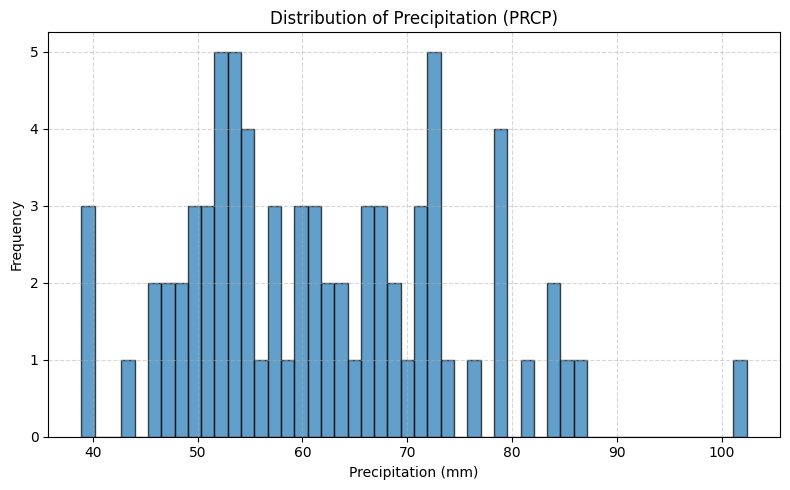

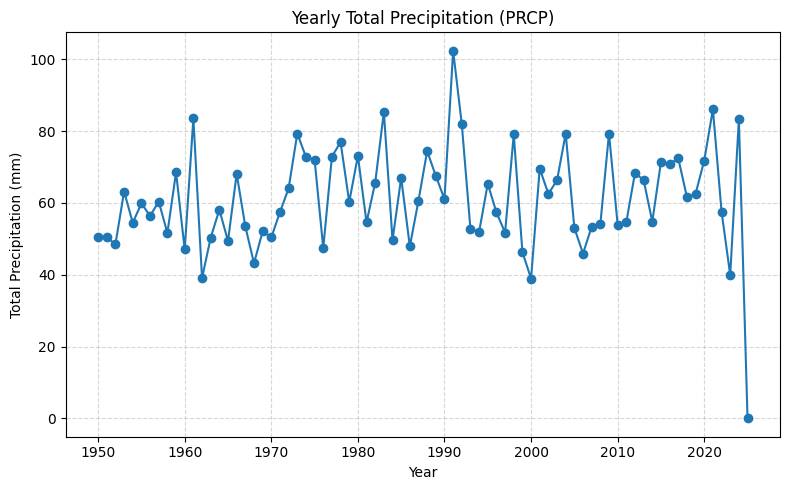

In [110]:
df_rainfall_NOAirport=pd.read_csv("/content/4012474.csv")
df_rainfall_NOAirport.columns

abbreviations_to_keep = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'EMXP', 'EMSD', 'EMSN', 'DSND', 'DSNW', 'PRCP', 'SNOW']

# #Filter the DataFrame to keep only those columns
df_filtered = df_rainfall_NOAirport[abbreviations_to_keep]

# #Optionally preview the filtered DataFrame


df_filtered['PRCP'].dropna()

# Plot distribution of PRCP
plt.figure(figsize=(8, 5))
plt.hist(df_filtered['PRCP'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Precipitation (PRCP)')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot yearly PRCP
df_yearly_prcp = df_filtered.groupby('DATE')['PRCP'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(df_yearly_prcp['DATE'], df_yearly_prcp['PRCP'], marker='o')
plt.title('Yearly Total Precipitation (PRCP)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [111]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
import matplotlib.pyplot as plt

# Assuming data and gamma_params are already defined
shape, loc, scale = gamma.fit(df_filtered["PRCP"].dropna())

# Simulate 30 years of PRCP
np.random.seed(42)
simulated_prcp = gamma.rvs(shape, loc=loc, scale=scale, size=30)

forecast_df = pd.DataFrame({
    "Year": np.arange(2024, 2054),
    "Simulated_PRCP_mm": simulated_prcp
})
forecast_df

,Year,Simulated_PRCP_mm
0,2024,66.862783
1,2025,58.547293
2,2026,57.400259
3,2027,57.400453
4,2028,84.136125
5,2029,70.803924
6,2030,54.701449
7,2031,67.513117
8,2032,63.373465
9,2033,41.482239


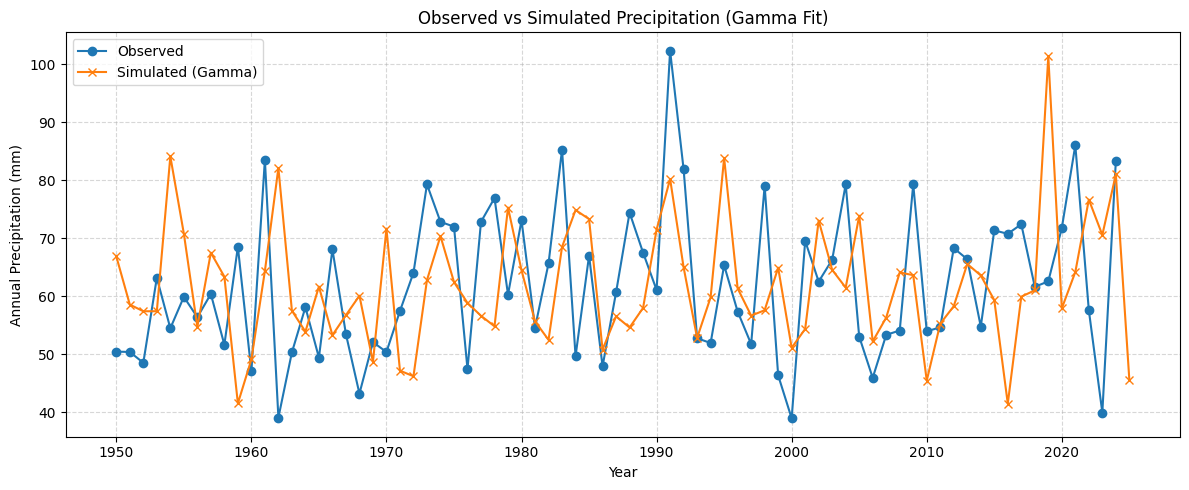

In [112]:
from scipy.stats import gamma

# Fit gamma to historical PRCP values
shape, loc, scale = gamma.fit(df_filtered["PRCP"].dropna())

n_years = df_filtered.shape[0]
simulated_prcp_hist = gamma.rvs(shape, loc=loc, scale=scale, size=n_years, random_state=42)

# Combine actual and simulated
validation_df = pd.DataFrame({
    "Year": df_filtered["DATE"],
    "Observed_PRCP_mm": df_filtered["PRCP"].values,
    "Simulated_PRCP_mm": simulated_prcp_hist
})

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(validation_df["Year"], validation_df["Observed_PRCP_mm"], label="Observed", marker='o')
plt.plot(validation_df["Year"], validation_df["Simulated_PRCP_mm"], label="Simulated (Gamma)", marker='x')
plt.title("Observed vs Simulated Precipitation (Gamma Fit)")
plt.xlabel("Year")
plt.ylabel("Annual Precipitation (mm)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

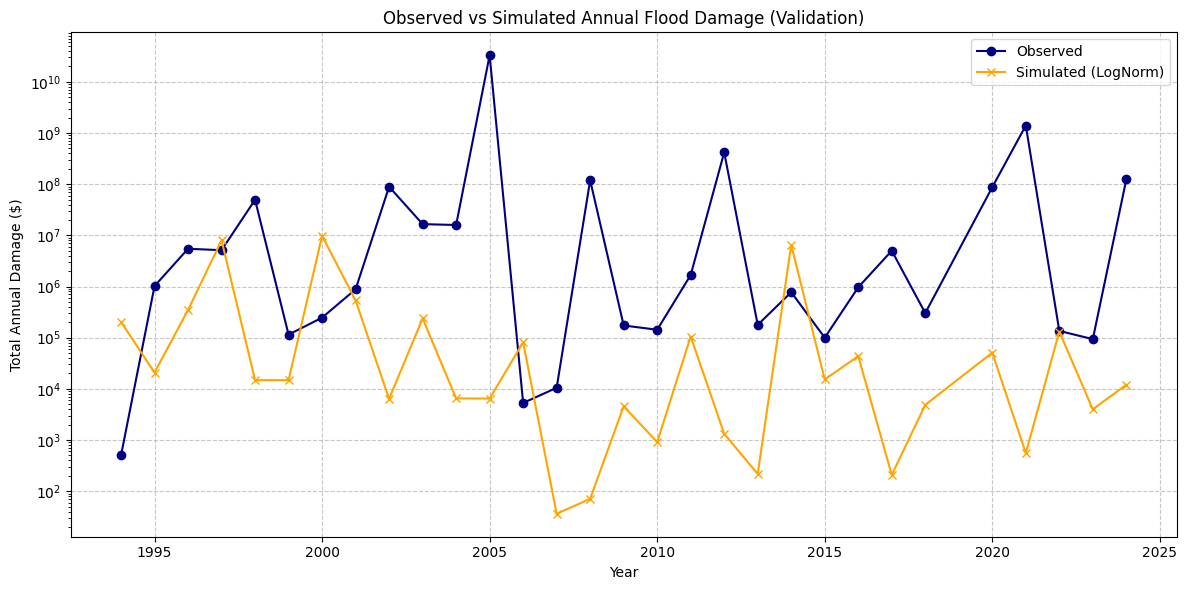

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Reload historical damage data (from prior context)
# df_New_Orleans already contains 'DAMAGE_PROPERTY' and 'YEAR'
df_actual_damage = df_New_Orleans[df_New_Orleans['DAMAGE_PROPERTY'] > 0].copy()

# Aggregate observed damage per year
annual_actual = df_actual_damage.groupby('YEAR')['DAMAGE_PROPERTY'].sum().reset_index()
annual_actual.columns = ['Year', 'Observed_Damage']

# Fit a log-normal distribution to the raw (non-log-transformed) damage values
damage_values = df_actual_damage['DAMAGE_PROPERTY']
shape, loc, scale = lognorm.fit(damage_values, floc=0)  # force location = 0 for stability

# Simulate damages for the same number of years
simulated_damages = lognorm.rvs(s=shape, loc=loc, scale=scale, size=len(annual_actual), random_state=42)

# Create comparison DataFrame
df_damage_compare = annual_actual.copy()
df_damage_compare["Simulated_Damage"] = simulated_damages

# Plot observed vs simulated damage (log scale for spread clarity)
plt.figure(figsize=(12, 6))
plt.plot(df_damage_compare["Year"], df_damage_compare["Observed_Damage"], marker='o', label="Observed", color='navy')
plt.plot(df_damage_compare["Year"], df_damage_compare["Simulated_Damage"], marker='x', label="Simulated (LogNorm)", color='orange')
plt.title("Observed vs Simulated Annual Flood Damage (Validation)")
plt.xlabel("Year")
plt.ylabel("Total Annual Damage ($)")
plt.yscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()